### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read in the Data 

Source: https://github.com/ahsan084/Banking-Dataset

In [4]:
file_path = '../data/Comprehensive_Banking_Database.csv'
df = pd.read_csv(file_path)

In [9]:
df.head()

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,226.22,11/26/2023,3/20/2023,8142,1,10/6/2023,Suggestion,Resolved,1/22/2023,1
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,42.84,11/5/2023,6/16/2023,4306,2,4/7/2023,Complaint,Resolved,8/27/2023,1
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,1/8/2023,3/20/2023,4842,3,9/7/2023,Praise,Pending,5/11/2023,1
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,216.46,9/8/2023,10/15/2023,9463,4,5/28/2023,Complaint,Resolved,7/5/2023,1
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,1.29,3/4/2023,7/27/2023,2209,5,2/12/2023,Complaint,Resolved,11/21/2023,1


In [7]:
df.shape

(5000, 40)

### Check for Missing Values

There are no missing values in this dataset. 

In [9]:
df.isnull().sum()

Customer ID                          0
First Name                           0
Last Name                            0
Age                                  0
Gender                               0
Address                              0
City                                 0
Contact Number                       0
Email                                0
Account Type                         0
Account Balance                      0
Date Of Account Opening              0
Last Transaction Date                0
TransactionID                        0
Transaction Date                     0
Transaction Type                     0
Transaction Amount                   0
Account Balance After Transaction    0
Branch ID                            0
Loan ID                              0
Loan Amount                          0
Loan Type                            0
Interest Rate                        0
Loan Term                            0
Approval/Rejection Date              0
Loan Status              

In [11]:
df.columns

Index(['Customer ID', 'First Name', 'Last Name', 'Age', 'Gender', 'Address',
       'City', 'Contact Number', 'Email', 'Account Type', 'Account Balance',
       'Date Of Account Opening', 'Last Transaction Date', 'TransactionID',
       'Transaction Date', 'Transaction Type', 'Transaction Amount',
       'Account Balance After Transaction', 'Branch ID', 'Loan ID',
       'Loan Amount', 'Loan Type', 'Interest Rate', 'Loan Term',
       'Approval/Rejection Date', 'Loan Status', 'CardID', 'Card Type',
       'Credit Limit', 'Credit Card Balance', 'Minimum Payment Due',
       'Payment Due Date', 'Last Credit Card Payment Date', 'Rewards Points',
       'Feedback ID', 'Feedback Date', 'Feedback Type', 'Resolution Status',
       'Resolution Date', 'Anomaly'],
      dtype='object')

### Clean Columns 

The original dataset has 40 columns, not all of these columns will be used for our clustering models.

#### **Columns to Keep**
* **Customer ID:** A unique identifier for each user
* **Age:** May be indicative of risk tolerance
* **City** Shows regional differences, ex: users in larger cities may have different investing practices than those living in rural areas
*  **Account Balance:** Shows how much user is likely to invest and risk tolerance

#### **Columns to Keep (Tentatively)**
*  **Credit Limit, Credit Card Balance:** Might be useful to know user's credit health, this may impact investment decisions
*  **Account Type:** Segmenting users based on account type(savings, checking) could help determine their investment profiles
*  **Gender:** Could provide insights to portfolio prefernces just like age

#### **Columns to Drop**
* **Name:** Not useful for clustering
* **Address, Contact Number, Email:** Personal info is not relevant
* **Account Info:** Specifics are not useful
* **Feedback Data:** Has no predictive value
* **Branch ID:** Not relevant to user


In [13]:
# Listing relevant columns 
relevant_columns = ['Customer ID', 'Age', 'Gender', 'City', 'Account Type', 'Account Balance', 'Account Balance After Transaction', 'Credit Limit', 'Credit Card Balance']

In [15]:
clean_df = df[relevant_columns]

In [17]:
clean_df.set_index('Customer ID', inplace = True)
clean_df.head()

,Age,Gender,City,Account Type,Account Balance,Account Balance After Transaction,Credit Limit,Credit Card Balance
Customer ID,,,,,,,,
1,45,Male,Fort Worth,Current,1313.38,2770.99,1737.88,4524.32
2,47,Female,Louisville,Current,5988.46,7649.45,1799.36,856.70
3,25,Female,Philadelphia,Current,8277.88,7437.97,6112.96,3242.36
4,52,Other,Oklahoma City,Savings,7487.21,12396.10,2069.41,4329.17
5,68,Other,Phoenix,Savings,6993.55,6404.48,2765.30,25.72


#### Ensure Data Types are Correct

In [19]:
clean_df.dtypes

Age                                    int64
Gender                                object
City                                  object
Account Type                          object
Account Balance                      float64
Account Balance After Transaction    float64
Credit Limit                         float64
Credit Card Balance                  float64
dtype: object

In [21]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                5000 non-null   int64  
 1   Gender                             5000 non-null   object 
 2   City                               5000 non-null   object 
 3   Account Type                       5000 non-null   object 
 4   Account Balance                    5000 non-null   float64
 5   Account Balance After Transaction  5000 non-null   float64
 6   Credit Limit                       5000 non-null   float64
 7   Credit Card Balance                5000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 351.6+ KB


#### Check for Outliers and Handle if Needed

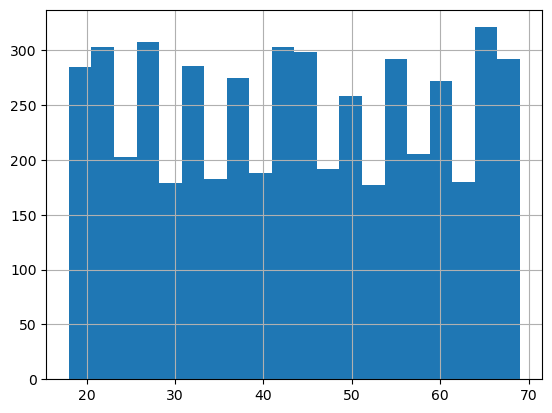

<Figure size 640x480 with 0 Axes>

In [41]:
# Age Outliers 
clean_df['Age'].hist(bins=20)
plt.show()
plt.savefig('../images/hist_age.png')

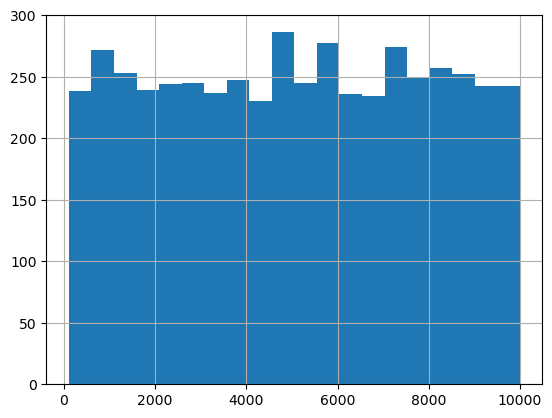

<Figure size 640x480 with 0 Axes>

In [43]:
# Account Balance
clean_df['Account Balance'].hist(bins=20)
plt.show()
plt.savefig('../images/hist_acc_bal.png')

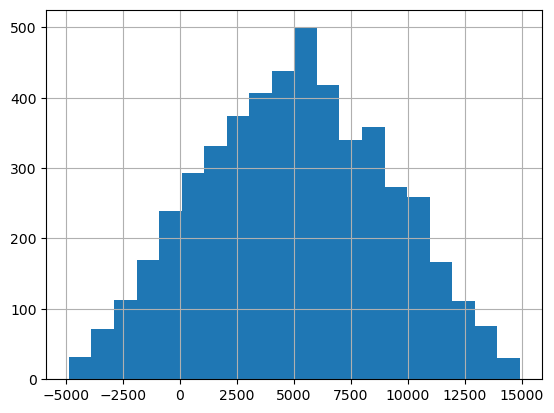

<Figure size 640x480 with 0 Axes>

In [45]:
# Account Balance After Transaction
clean_df['Account Balance After Transaction'].hist(bins=20)
plt.show()
plt.savefig('../images/hist_acc_bal_aft.png')

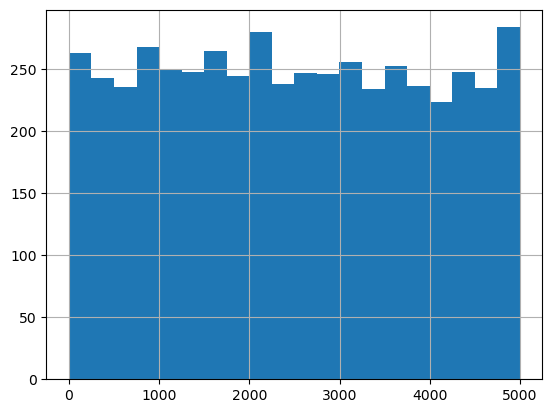

<Figure size 640x480 with 0 Axes>

In [47]:
# Credit Card Balance
clean_df['Credit Card Balance'].hist(bins=20)
plt.show()
plt.savefig('../images/hist_credit_bal.png')

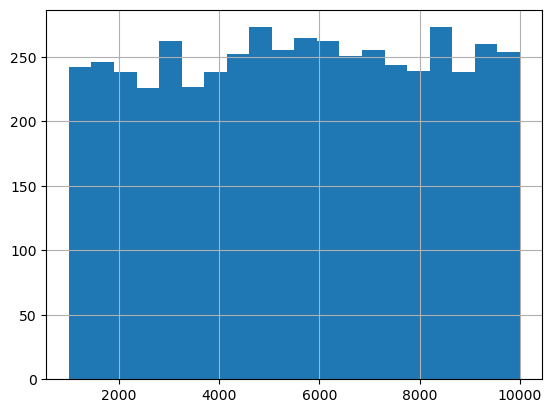

In [31]:
# Credit Card Limit
clean_df['Credit Limit'].hist(bins=20)
plt.show()
plt.savefig('../images/hist_credit_limit.png')

In [33]:
# Distribution of Gender
clean_df['Gender'].value_counts()

Gender
Female    1727
Other     1639
Male      1634
Name: count, dtype: int64

In [35]:
# Cities
clean_df['City'].value_counts()

City
San Jose            163
Indianapolis        152
San Francisco       148
Detroit             143
Denver              138
Tucson              138
Las Vegas           137
El Paso             133
Columbus            131
Washington          130
Atlanta             129
Jacksonville        129
Los Angeles         127
San Diego           126
Louisville          126
Memphis             126
Mesa                125
Milwaukee           125
New York            125
Nashville           125
Houston             124
Philadelphia        124
Colorado Springs    123
San Antonio         123
Chicago             123
Dallas              123
Charlotte           122
Seattle             122
Fort Worth          120
Kansas City         119
Portland            118
Oklahoma City       116
Baltimore           115
Boston              114
Phoenix             110
Sacramento          107
Austin              107
Albuquerque         106
Omaha               106
Fresno              102
Name: count, dtype: int64

#### Save Cleaned DataFrame as .csv

In [38]:
output_path = '../data/clean_data/clean-data.csv'
clean_df.to_csv(output_path, index = False)